In [1]:
import scipy as sp
import scipy.misc
import matplotlib.pyplot as plt
import numpy as np
import imageio
%matplotlib inline

In [2]:
from comet_ml import Experiment
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="kYVqzmHEUN7WQLo86k2bZs1Z7",
                        project_name="mri-epilepsy-segmentation", workspace="kondratevakate")

from tqdm import tqdm_notebook, tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.models.vgg import vgg11_bn
from torch.autograd import Function, Variable
import random
import numpy as np

import sys
import os
from optparse import OptionParser

import torch.backends.cudnn as cudnn
from torch import optim
import time

import pandas as pd

/gpfs/data/opt/python-3.6.8/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
COMET INFO: old comet version (3.1.7) detected. current: 3.1.8 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/kondratevakate/mri-epilepsy-segmentation/07e2acc9cbe8466d9d9e29506dd09fa3



In [3]:
!nvidia-smi

Tue May 26 19:16:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 440.64.00    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:02:00.0 Off |                  N/A |
| 21%   23C    P8     9W / 250W |      0MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import sys
sys.path.append("..")

# import utils 
from utils.viz_tools import plot_central_cuts, plot_predicted
from utils.data import MriSegmentation

 13%|█▎        | 2/15 [00:00<00:01, 11.42it/s]

Assembling data for:  pirogov  sample.


100%|██████████| 15/15 [00:01<00:00, 11.41it/s]


Dataset size: 15
Labels distribution: (array([1]), array([15]))

Image shape: torch.Size([1, 192, 192, 192])
Segmentation shape: torch.Size([1, 192, 192, 192])


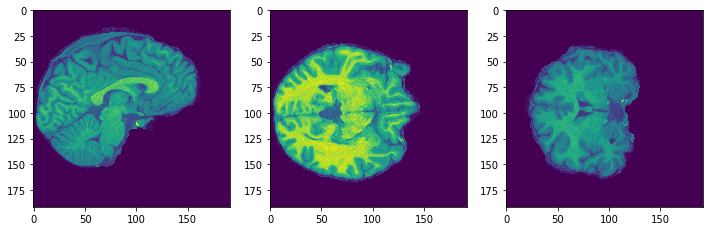

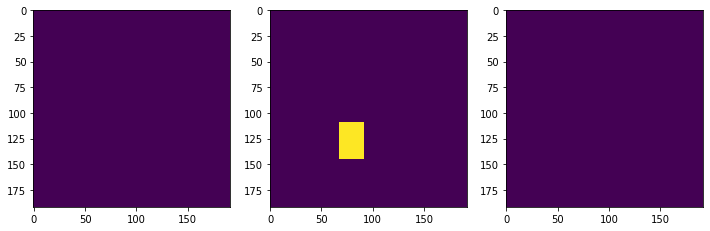

In [7]:
data_params = {
    'sample':'pirogov', 
    'prefix':'fcd', 
    'mask':'bb', 
    
    'ignore_missing':'True',
    'mask_path':'/gpfs/gpfs0/sbi/data/fcd_classification_bank/masks/',
    'image_path':'/gpfs/gpfs0/sbi/data/fcd_classification_bank',
    'targets_path':'../targets/targets_fcd_bank.csv',
    'coord_min':(30, 30, 30),
    'img_shape' :(192, 192, 192)
}

fcd_data = MriSegmentation(**data_params)

print("Dataset size: {}".format(len(fcd_data)))
print("Labels distribution: {}\n".format(np.unique(pirogov_data.target, return_counts=True)))
img, seg = pirogov_data[3]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))
plot_central_cuts(img)
plot_central_cuts(seg)

  7%|▋         | 2/30 [00:00<00:02, 11.40it/s]

Assembling data for:  pirogov  sample.


100%|██████████| 30/30 [00:02<00:00, 11.45it/s]


Dataset size: 28
Labels distribution: (array([1]), array([28]))

Image shape: torch.Size([1, 192, 192, 192])
Segmentation shape: torch.Size([1, 192, 192, 192])


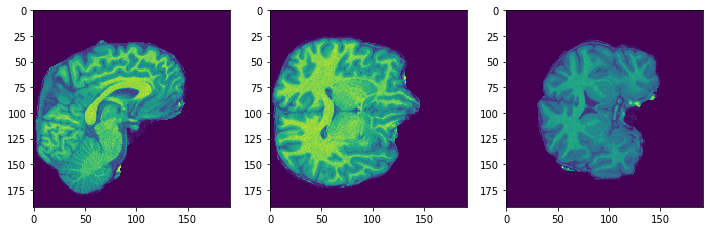

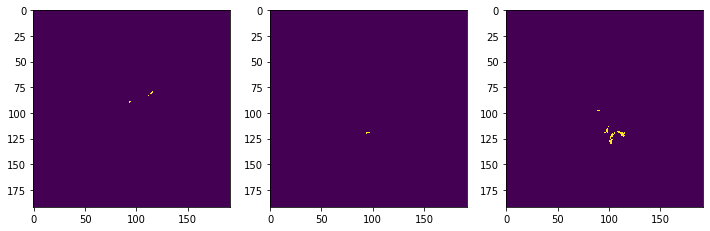

In [6]:
pirogov_data = MriSegmentation(sample='pirogov',  mask='seg', ignore_missing=True,
                         image_path= '/gpfs/gpfs0/sbi/data/fcd_classification_bank',
                         targets_path= '../targets/targets_fcd_bank.csv')

print("Dataset size: {}".format(len(pirogov_data)))
print("Labels distribution: {}\n".format(np.unique(pirogov_data.target, return_counts=True)))
img, seg = pirogov_data[1]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))
plot_central_cuts(img)
plot_central_cuts(seg)

In [ ]:
all_data = MriSegmentation(sample='all',  mask='seg', ignore_missing=True,
                         image_path= '/gpfs/gpfs0/sbi/data/fcd_classification_bank',
                         targets_path= '../targets/targets_fcd_bank.csv')

print("Dataset size: {}".format(len(all_data)))
print("Labels distribution: {}\n".format(np.unique(all_data.target, return_counts=True)))
img, seg = all_data[1]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))
plot_central_cuts(img)
plot_central_cuts(seg)

## 1. Training w/o data normalisation

In [ ]:
from routine imort *

In [ ]:
from sklearn.model_selection import StratifiedKFold, ShuffleSplit
from torch.utils.data import DataLoader, Subset
import warnings
from unet import UNet

import multiprocessing

# Config
seed = 42
num_epochs = 30
compute_histograms = False
train_whole_images = False
train_patches = False
batch_size = 1


cv = ShuffleSplit(n_splits=1,  test_size = 0.3, random_state=42)
cv_splits = list(cv.split(X=np.arange(len(pirogov_data)), y=pirogov_data.target))
training_idx, validation_idx = cv_splits[0]


training_loader = torch.utils.data.DataLoader(
    Subset(pirogov_data, training_idx),
    batch_size= batch_size,
    shuffle=True,
    num_workers=multiprocessing.cpu_count(),
)

validation_loader = torch.utils.data.DataLoader(
    Subset(pirogov_data, validation_idx),
    batch_size=batch_size,
    num_workers=multiprocessing.cpu_count(),
)


print('Training set:', len(Subset(pirogov_data, training_idx)), 'subjects')
print('Validation set:', len(Subset(pirogov_data, validation_idx)), 'subjects')

In [ ]:
# добавить счедулер и холдаут выборку пирогова

In [16]:
model, optimizer = get_model_and_optimizer(device)
model.load_state_dict(torch.load('whole_images_epoch_38.pth'))

<All keys matched successfully>

In [45]:
# pretrained to 40 epochs
num_epochs = 5
weights_stem = 'whole_images'
train(num_epochs, training_loader, validation_loader, model, optimizer, weights_stem)

  0%|          | 0/19 [00:00<?, ?it/s]

Validation mean loss: 0.357
Starting epoch 1


  0%|          | 0/9 [00:00<?, ?it/s]

Training mean loss: 0.347


  0%|          | 0/19 [00:00<?, ?it/s]

Validation mean loss: 0.397
Starting epoch 2


  0%|          | 0/9 [00:00<?, ?it/s]

Training mean loss: 0.339


  0%|          | 0/19 [00:00<?, ?it/s]

Validation mean loss: 0.369
Starting epoch 3


  0%|          | 0/9 [00:00<?, ?it/s]

Training mean loss: 0.332


  0%|          | 0/19 [00:00<?, ?it/s]

Validation mean loss: 0.390
Starting epoch 4


  0%|          | 0/9 [00:00<?, ?it/s]

Training mean loss: 0.332


  0%|          | 0/19 [00:00<?, ?it/s]

Validation mean loss: 0.342
Starting epoch 5


  0%|          | 0/9 [00:00<?, ?it/s]

Training mean loss: 0.331


100%|██████████| 9/9 [00:03<00:00,  2.45it/s]

Validation mean loss: 0.786


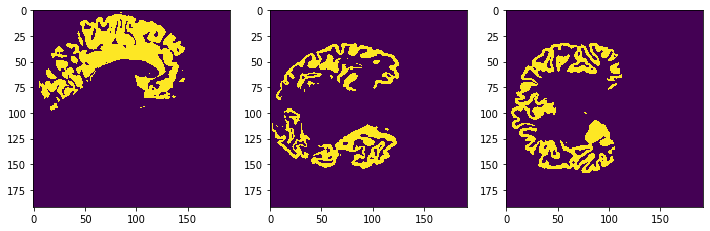

In [17]:
batch = next(iter(validation_loader))
model.eval()
inputs, targets = prepare_batch(batch, device)
with torch.no_grad():
    logits = forward(model, inputs)
labels = logits.argmax(dim=CHANNELS_DIMENSION)
foreground = labels[0].cpu().numpy().astype(np.uint8)
plot_central_cuts(foreground)

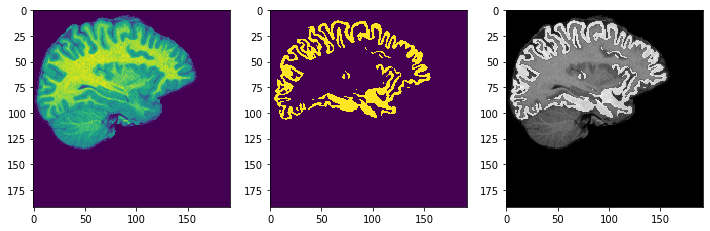

In [27]:
plot_predicted(inputs, foreground, 30, title="")

### 3. Patch based segmentation

In [29]:
def show_nifti(image_path_or_image, colormap='gray'):
    try:
        from niwidgets import NiftiWidget
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=FutureWarning)
            widget = NiftiWidget(image_path_or_image)
            widget.nifti_plotter(colormap=colormap)
    except Exception:
        if isinstance(image_path_or_image, nib.AnalyzeImage):
            nii = image_path_or_image
        else:
            image_path = image_path_or_image
            nii = nib.load(str(image_path))
        k = int(nii.shape[-1] / 2)
        plt.imshow(nii.dataobj[..., k], cmap=colormap)

In [30]:
subjects = []

MRI = 'mri'
BRAIN = 'brain'

for i in range(0,len(pirogov_data)):
    subject_dict = {
        MRI: torchio.Image(pirogov_data.img_files[i], torchio.INTENSITY),
        BRAIN: torchio.Image(pirogov_data.img_seg[i], torchio.LABEL),
    }
    subject = torchio.Subject(subject_dict)
    subjects.append(subject)
dataset = torchio.ImagesDataset(subjects)
print('Dataset size:', len(dataset), 'subjects')

Dataset size: 28 subjects


In [31]:
from operator import itemgetter
training_subjects = itemgetter(13, 15,  1,  4,  5,  2, 16, 23,  3, 26, 24, 18, 27, 20,  7, 10, 14,
       19,  6)(subjects)
validation_subjects = itemgetter(9, 25,  8, 21,  0, 12, 17, 22, 11)(subjects)

training_set = torchio.ImagesDataset(training_subjects)
validation_set = torchio.ImagesDataset(validation_subjects)

In [32]:
patch_size = 64
samples_per_volume = 8
max_queue_length = 240
training_batch_size = 16
validation_batch_size = 16

patches_training_set = torchio.Queue(
    subjects_dataset=training_set,
    max_length=max_queue_length,
    samples_per_volume=samples_per_volume,
    patch_size=patch_size,
    sampler_class=torchio.sampler.ImageSampler,
    num_workers=multiprocessing.cpu_count(),
    shuffle_subjects=True,
    shuffle_patches=True,
)

patches_validation_set = torchio.Queue(
    subjects_dataset=validation_set,
    max_length=max_queue_length,
    samples_per_volume=samples_per_volume,
    patch_size=patch_size,
    sampler_class=torchio.sampler.ImageSampler,
    num_workers=multiprocessing.cpu_count(),
    shuffle_subjects=False,
    shuffle_patches=False,
)

training_loader = torch.utils.data.DataLoader(
    patches_training_set, batch_size=training_batch_size)

validation_loader = torch.utils.data.DataLoader(
    patches_validation_set, batch_size=validation_batch_size)

from torchio import AFFINE, DATA, PATH, TYPE, STEM
def prepare_batch(batch, device):
    inputs = batch[MRI][DATA].to(device)
    targets = batch[MRI][DATA].to(device)
    return inputs, targets

In [33]:
import SimpleITK as sitk

In [34]:
num_epochs = 40

In [40]:
experiment.set_name("Patch based, 64 batch")

def train(num_epochs, training_loader, validation_loader, model, optimizer, weights_stem):
    run_epoch(0, Action.VALIDATE, validation_loader, model, optimizer)
    for epoch_idx in range(1, num_epochs + 1):
        print('Starting epoch', epoch_idx)
        run_epoch(epoch_idx, Action.TRAIN, training_loader, model, optimizer)
        run_epoch(epoch_idx, Action.VALIDATE, validation_loader, model, optimizer)
        experiment.log_epoch_end(epoch_idx)
        
        
def run_epoch(epoch_idx, action, loader, model, optimizer):
    is_training = action == Action.TRAIN
    epoch_losses = []
    model.train(is_training)
    for batch_idx, batch in enumerate(tqdm(loader)):
        inputs, targets = prepare_batch(batch, device)
        optimizer.zero_grad()
        with torch.set_grad_enabled(is_training):
            logits = forward(model, inputs)
            probabilities = F.softmax(logits, dim=CHANNELS_DIMENSION)
            batch_losses = get_dice_loss(probabilities, targets)
            batch_loss = batch_losses.mean()
            if is_training:
                batch_loss.backward()
                optimizer.step()
            epoch_losses.append(batch_loss.item())
            if action == Action.TRAIN:
                experiment.log_metric("train_dice_loss", batch_loss.item())
            elif action == Action.VALIDATE:
                experiment.log_metric("validate_dice_loss", batch_loss.item())
    epoch_losses = np.array(epoch_losses)
    
    print(f'{action.value} mean loss: {epoch_losses.mean():0.3f}')

In [41]:
# model, optimizer = get_model_and_optimizer(device)
# model.load_state_dict(torch.load('patches_epoch_39.pth'))

weights_stem = 'patches'
train(num_epochs, training_loader, validation_loader, model, optimizer, weights_stem)

 40%|████      | 2/5 [00:00<00:00,  4.21it/s]Traceback (most recent call last):
  File "/gpfs/data/opt/python-3.6.8/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/gpfs/data/opt/python-3.6.8/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/gpfs/data/opt/python-3.6.8/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/gpfs/data/opt/python-3.6.8/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.253
Starting epoch 1


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.188


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.243
Starting epoch 2


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.231


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.243
Starting epoch 3


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.254


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.241
Starting epoch 4


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.193


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.353
Starting epoch 5


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.174


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.358
Starting epoch 6


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.260


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.314
Starting epoch 7


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.193


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.388
Starting epoch 8


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.187


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.181
Starting epoch 9


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.210


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.294
Starting epoch 10


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.252


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.285
Starting epoch 11


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.199


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.216
Starting epoch 12


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.294


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.204
Starting epoch 13


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.277


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.306
Starting epoch 14


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.224


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.320
Starting epoch 15


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.254


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.229
Starting epoch 16


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.218


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.389
Starting epoch 17


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.235


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.183
Starting epoch 18


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.240


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.241
Starting epoch 19


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.236


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.243
Starting epoch 20


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.175


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.285
Starting epoch 21


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.222


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.266
Starting epoch 22


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.225


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.254
Starting epoch 23


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.222


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.199
Starting epoch 24


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.223


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.232
Starting epoch 25


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.224


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.204
Starting epoch 26


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.254


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.232
Starting epoch 27


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.151


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.205
Starting epoch 28


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.219


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.239
Starting epoch 29


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.211


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.341
Starting epoch 30


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.218


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.168
Starting epoch 31


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.195


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.293
Starting epoch 32


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.209


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.217
Starting epoch 33


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.226


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.231
Starting epoch 34


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.231


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.230
Starting epoch 35


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.215


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.269
Starting epoch 36


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.203


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.513
Starting epoch 37


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.295


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.294
Starting epoch 38


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.222


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.260
Starting epoch 39


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.283


  0%|          | 0/10 [00:00<?, ?it/s]

Validation mean loss: 0.196
Starting epoch 40


  0%|          | 0/5 [00:00<?, ?it/s]

Training mean loss: 0.239


100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

Validation mean loss: 0.279


/gpfs/data/opt/python-3.6.8/lib/python3.6/site-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


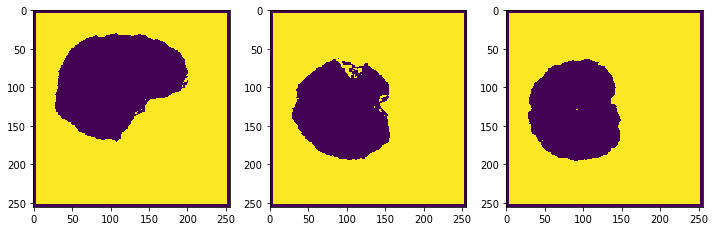

In [33]:
import nibabel as nib
sample = random.choice(validation_set)
input_tensor = sample[MRI][DATA][0]
patch_size = 48, 48, 48  # we can user larger patches for inference
patch_overlap = 4, 4, 4
grid_sampler = torchio.inference.GridSampler(
    sample,
    patch_size,
    patch_overlap,
)
patch_loader = torch.utils.data.DataLoader(
    grid_sampler, batch_size=validation_batch_size)
aggregator = torchio.inference.GridAggregator(
    sample,
    patch_overlap,
)

model.eval()
with torch.no_grad():
    for patches_batch in patch_loader:
        inputs = patches_batch[MRI][DATA].to(device)
        locations = patches_batch['location']
        logits = model(inputs)
        labels = logits.argmax(dim=CHANNELS_DIMENSION, keepdim=True)
        aggregator.add_batch(labels, locations)
plot_central_cuts(aggregator.get_output_tensor())

In [ ]:
# plot batches